# Geometric Transformations

In [1]:
import cv2

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

#!matplotlib inline

## Load Image

We use `imread` to read images as `numpy` arrays. We can get the imahe size using the `shape` field of a `numpy` array. Note that because of the matrix like interface image size is given as (n_rows, n_columns, n_channels) format. So the imahe width is 256 and the height is 192. 

In [2]:
img = cv2.imread('robotech.jpg')
img.shape

(192, 256, 3)

## Color Conversion

OpenCV loads color images with channel order BGR (blue followed by green and red). `matplotlib`and similar display libraries expect image channel order to be RGB. Below we use OpenCV function `cvtColor` to convert from BGR to RGB

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

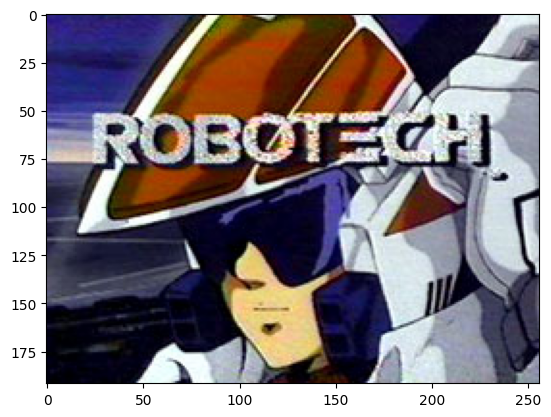

In [4]:
plt.imshow(img)

## Image Rotation

To rotate an image we can use the `warpAffine` function from OpenCV. If we just provide a rotation matrix without any translation, the image will be rotated around (0, 0) which is the top-left corner. To rotate around the image center, we first translate the center to origin, rotate the image, and then move the origin back to the center of the image.

In [5]:
def make_rotation(theta_in_degrees):
    theta = theta_in_degrees * np.pi / 180.0
    ct = np.cos(theta)
    st = np.sin(theta)
    R = np.array([[ct, -st], [st, ct]])
    return R

In [6]:
def rotate_image(img, theta_in_degrees, center=False):
    R = make_rotation(theta_in_degrees)
    t = np.array([0.0, 0.0])
    if center:
        tc = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0])
        t = - R @ tc + tc
    M = np.array([[R[0][0], R[0][1], t[0]], [R[1][0], R[1][1], t[1]]])
    rimg = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return rimg

In [7]:
rimg = rotate_image(img, 45.0, True)

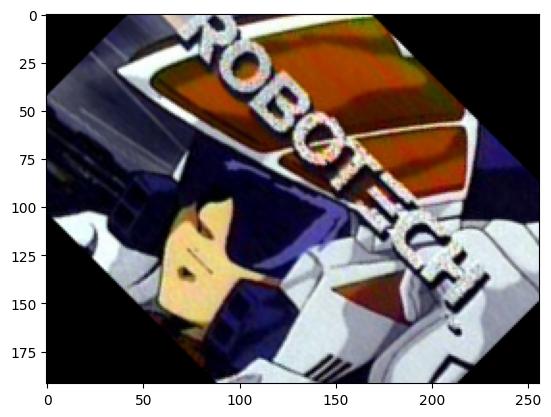

In [8]:
plt.imshow(rimg)

## Affine Deformations

We combine any invertable 2x2 matrix and a translation vector to create an affine deformation. We can also parameterize an affine deformation in terms of two rotations, two scaling factors for the x and y axes after rotation by phi, and a translation vector.

In [9]:
def affine_transform(img, theta_in_degrees, phi_in_degrees, lambda_1, lambda_2, center=False):
    Rtheta = make_rotation(theta_in_degrees)
    Rphi = make_rotation(phi_in_degrees)
    A = Rtheta @ Rphi.T @ np.diag([lambda_1, lambda_2]) @ Rphi
    t = np.array([0.0, 0.0])
    if center:
        tc = np.array([img.shape[1] / 2.0, img.shape[0] / 2.0])
        t = - A @ tc + tc
    M = np.array([[A[0][0], A[0][1], t[0]], [A[1][0], A[1][1], t[1]]])
    rimg = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return rimg

Below, we first calculate the rotation angle phi to rotate the image diagonal to the x-axis and then we scale by 0.7

In [10]:
phi = np.arctan2(img.shape[0], img.shape[1]) / np.pi * 180
aimg = affine_transform(img, 0.0, phi, 0.7, 1.0, True)

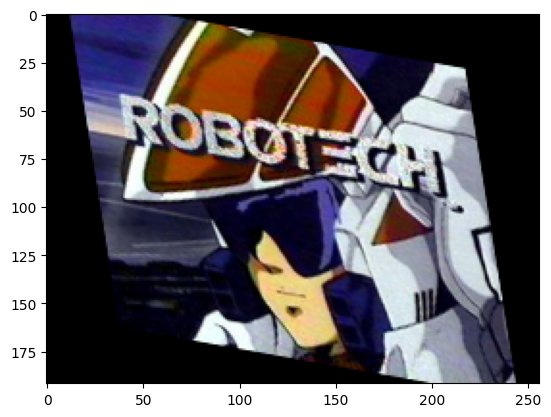

In [11]:
plt.imshow(aimg)